In [5]:
import pandas as pd
import matplotlib as plot

#get data
def GetData(fileName):
    return pd.read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.head(10)

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96
1999-01-07,83.12
1999-01-08,82.37
1999-01-11,77.03
1999-01-12,83.44


In [7]:
#Describe the data set
exchangeRatesSeries.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


In [20]:
#last and first values
exchangeRatesSeries.head(2)
exchangeRatesSeries.tail(1)

,GBP/USD Close
Date,
2018-07-18,47.4


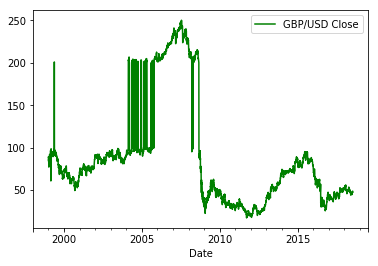

In [12]:
#plot the time series data

exchangeRatesSeries.plot(color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15580c978>]],
      dtype=object)

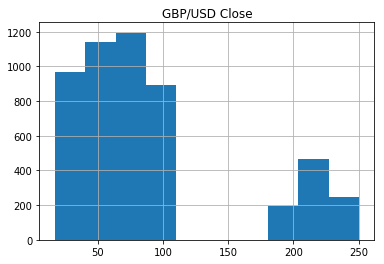

In [21]:
#histogram of the data
exchangeRatesSeries.hist()

In [32]:
#Usamos la libreria Statmodels de python: 
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html

#ARIMA model has 3 parameters:

# P — Auto regressive feature of the model

# D — Differencing order

# Q — Moving average feature of the model
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#creating data
ExchangeRates = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

#predict next value
predicted = StartARIMAForecasting(ExchangeRates, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

Predicted=15.219305


/home/marcelo/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/marcelo/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/marcelo/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [28]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import MeanSquaredError   No encuentro sklearn

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#Get exchange rates
ActualData = GetData('/home/marcelo/Python/exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forecast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
#Error = MeanSquaredError(TestData, Predictions)
#print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-28-07e23031da0f>, line 4)